In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#method : scaling, log transformation, cube Root normalization, Box-Cox transformation
from scipy.stats import skew 
from scipy.stats import boxcox
%matplotlib inline

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
# remove duplicated data
df = df.drop_duplicates()
print(df.shape)
df.info()

(301717, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyD

In [3]:
# noise 처리
df = df[(df['BMI'] < 80) & (df['SleepTime'] != 24)]
df.shape

(301653, 18)

## encoding

In [4]:
def yesno_tolabel(x):
    if (x == 'Yes') | (x == 'Yes (during pregnancy)') :
        return 1
    else:
        return 0

In [5]:
sex_map = {'Female' : 0, 'Male' : 1}
health_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
for column in columns:
    df[column] = df[column].apply(lambda x : yesno_tolabel(x))

df['Sex'] = df['Sex'].map(sex_map)
df['GenHealth'] = df['GenHealth'].map(health_map)
df['Diabetic'] = df['Diabetic'].map(diabetic_map)
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [6]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,2,12.0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301653 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301653 non-null  int64  
 1   BMI               301653 non-null  float64
 2   Smoking           301653 non-null  int64  
 3   AlcoholDrinking   301653 non-null  int64  
 4   Stroke            301653 non-null  int64  
 5   PhysicalHealth    301653 non-null  float64
 6   MentalHealth      301653 non-null  float64
 7   DiffWalking       301653 non-null  int64  
 8   Sex               301653 non-null  int64  
 9   AgeCategory       301653 non-null  int64  
 10  Race              301653 non-null  object 
 11  Diabetic          301653 non-null  int64  
 12  PhysicalActivity  301653 non-null  int64  
 13  GenHealth         301653 non-null  int64  
 14  SleepTime         301653 non-null  float64
 15  Asthma            301653 non-null  int64  
 16  KidneyDisease     30

In [8]:
#Race 인코딩 - 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(sparse = False)
train_race = ohe.fit_transform(df[['Race']])

ohe_hot_df = pd.DataFrame(train_race, columns = ohe.categories_)

df = df.reset_index().drop('index', axis = 1)

df = pd.concat([df, ohe_hot_df], axis = 1).drop('Race', axis = 1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,"(American Indian/Alaskan Native,)","(Asian,)","(Black,)","(Hispanic,)","(Other,)","(White,)"
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,5.0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,8.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,6.0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301648,1,27.41,1,0,0,7.0,0.0,1,1,60,...,6.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
301649,0,29.84,1,0,0,0.0,0.0,0,1,35,...,5.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
301650,0,24.24,0,0,0,0.0,0.0,0,0,45,...,6.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
301651,0,32.81,0,0,0,0.0,0.0,0,0,25,...,12.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


## outlier

In [9]:
def quantile_operation(outlier_df, column):
    quantile_1 = outlier_df[column].quantile(0.25)
    quantile_3 = outlier_df[column].quantile(0.75)
    iqr = quantile_3 - quantile_1
    Lower_tail = quantile_1 - 1.5 * iqr
    Upper_tail = quantile_3 + 1.5 * iqr

    return Lower_tail, Upper_tail

In [10]:
df['PhysicalHealth'] = df['PhysicalHealth'] + 1
df['MentalHealth'] = df['MentalHealth'] + 1
outlier_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for column in outlier_columns:
    Lower_tail, Upper_tail = quantile_operation(df, column)
    df[column] = boxcox(df[column])[0]

In [11]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,"(American Indian/Alaskan Native,)","(Asian,)","(Black,)","(Hispanic,)","(Other,)","(White,)"
0,0,1.403407,1,0,0,0.669364,1.089487,0,0,55,...,3.488639,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1.442302,0,0,1,0.000000,0.000000,0,0,80,...,5.054525,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1.487128,1,0,0,0.801003,1.089487,0,1,65,...,5.813435,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1.472250,0,0,0,0.000000,0.000000,0,0,75,...,4.280563,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1.468816,0,0,0,0.807551,0.000000,1,0,40,...,5.813435,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301648,1,1.491857,1,0,0,0.755892,0.000000,1,1,60,...,4.280563,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
301649,0,1.504497,1,0,0,0.000000,0.000000,0,1,35,...,3.488639,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
301650,0,1.472452,0,0,0,0.000000,0.000000,0,0,45,...,4.280563,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
301651,0,1.517915,0,0,0,0.000000,0.000000,0,0,25,...,8.734516,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301653 entries, 0 to 301652
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   HeartDisease                       301653 non-null  int64  
 1   BMI                                301653 non-null  float64
 2   Smoking                            301653 non-null  int64  
 3   AlcoholDrinking                    301653 non-null  int64  
 4   Stroke                             301653 non-null  int64  
 5   PhysicalHealth                     301653 non-null  float64
 6   MentalHealth                       301653 non-null  float64
 7   DiffWalking                        301653 non-null  int64  
 8   Sex                                301653 non-null  int64  
 9   AgeCategory                        301653 non-null  int64  
 10  Diabetic                           301653 non-null  int64  
 11  PhysicalActivity                   3016

## 불균형 데이터 처리

In [13]:
# x, y분리
x = df.drop('HeartDisease', axis=1)
x_columns = x.columns
y = df['HeartDisease']

In [14]:
# train test 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state = 42)

In [15]:
# 데이터 불균형 처리 전 상태
print('origin target data :\n', df['HeartDisease'].value_counts())

origin target data :
 0    274401
1     27252
Name: HeartDisease, dtype: int64


### UnderSampling

In [16]:
# 언더 샘플링 처리 <- 코드만 남겨둘게요
from imblearn.under_sampling import *

#CNN
#x_train_CNN, y_train_CNN =CondensedNearestNeighbour(random_state=42).fit_resample(x_train, y_train) 

#ENN
#x_train_ENN, y_train_ENN =EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(x_train, y_train) 

#Tomek's link
#x_train_Tomek, y_train_Tomek =TomekLinks().fit_resample(x_train, y_train) 

#OSS
#x_train_OSS, y_train_OSS =OneSidedSelection(random_state=42).fit_resample(x_train, y_train) 

#NCR
#x_train_NCR, y_train_NCR =NeighbourhoodCleaningRule().fit_resample(x_train, y_train) 


#NearMiss-1
#x_train_NearMiss, y_train_NearMiss=NearMiss().fit_resample(x_train, y_train)

In [17]:
# # 언더 샘플링 결과 보기

# print('befor undersampling :\n', y_train.value_counts())
# print('\nAfter CNN :\n', y_train_CNN.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) #효과 미미 0=164205, 1=21811
# print('\nAfter ENN :\n', y_train_ENN.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts())  
# print('\nAfter TomekLink :\n', y_train_Tomek.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) #효과 미미 0=212240, 1=21811
# print('\nAfter OSS :\n', y_train_OSS.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) # 0=179268, 1=21811
# print('\nAfter NCR :\n', y_train_NCR.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) # 1대1 언더샘플링 너무 많은 손실?? 0,1=21811
# print('\nAfter NearMiss :\n', y_train_NearMiss.value_counts())
# print('\n\n')

### OverSampling

In [16]:
##오버샘플링 처리
from imblearn.over_sampling import *
from collections import Counter

#SMOTE
smote = SMOTE(random_state=42)
x_train_SMOTE, y_train_SMOTE =smote.fit_resample(x_train, y_train)
print(smote.nn_k_)

#BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)
x_train_BorderlineSM, y_train_BorderlineSM =bsmote.fit_resample(x_train, y_train)
print(bsmote.sampling_strategy_)
print(bsmote.nn_k_)
print(bsmote.nn_m_)

#SVMSMOTE
sm = SVMSMOTE(random_state=42)
x_train_SVMSMOTE, y_train_SVMSMOTE = sm.fit_resample(x_train, y_train)
print(sm.nn_k_)
print(sm.nn_m_)
print(sm.svm_estimator)

#ADASYN
ads = ADASYN(random_state=42)
x_train_ADASYN, y_train_ADASYN = ads.fit_resample(x_train, y_train)
print(ads.nn_)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


NearestNeighbors(n_neighbors=6)


C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


OrderedDict([(1, 197790)])
NearestNeighbors(n_neighbors=6)
NearestNeighbors(n_neighbors=11)


C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


NearestNeighbors(n_neighbors=6)
NearestNeighbors(n_neighbors=11)
None


C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


NearestNeighbors(n_neighbors=6)


In [17]:
#오버 샘플링 결과

print('befor oversampling :', Counter(y_train))
print('\nAfter SMOTE :', Counter(y_train_SMOTE))
print('\n\n')
print('befor oversampling :', Counter(y_train))
print('\nAfter BoderlineSMOTE :', Counter(y_train_BorderlineSM))
print('\n\n')
print('befor oversampling :', Counter(y_train))
print('\nAfter SVMSMOTE :', Counter(y_train_SVMSMOTE))
print('\n\n')
print('befor oversampling :', Counter(y_train))
print('\nAfter ADASYN :', Counter(y_train_ADASYN))
print('\n\n')

befor oversampling : Counter({0: 219556, 1: 21766})

After SMOTE : Counter({1: 219556, 0: 219556})



befor oversampling : Counter({0: 219556, 1: 21766})

After BoderlineSMOTE : Counter({1: 219556, 0: 219556})



befor oversampling : Counter({0: 219556, 1: 21766})

After SVMSMOTE : Counter({1: 219556, 0: 219556})



befor oversampling : Counter({0: 219556, 1: 21766})

After ADASYN : Counter({1: 220204, 0: 219556})





## 복합 - oversampling + undersampling

In [18]:
# 복합 샘플링 진행 
from imblearn.combine import *

#x_train_SMOTETomek, y_train_SMOTETomek =SMOTETomek(random_state=42).fit_resample(x_train, y_train) 

#SMOTETENN
smoteenn = SMOTEENN(random_state=42)
x_train_SMOTEENN, y_train_SMOTEENN = smoteenn.fit_resample(x_train, y_train)
print(smoteenn.smote_)
print(smoteenn.enn_)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


SMOTE(random_state=42)
EditedNearestNeighbours(sampling_strategy='all')


## SVM 모델

In [ ]:
#from sklearn.svm import SVC

#svm_model = SVC(kernel='rbf') # poly, linear
#svm_model = SVC(kernel='linear')
#svm_model.fit(x_train, y_train)
#y_pred = svm_model.predict(x_test)

### 불균형 처리 전

In [ ]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_model = SVC(kernel='rbf', probability=True)
svm_model.probability = True
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

**모든 test 데이터를 0으로 예측함**

accuracy: 0.9090683065090915  
precision: 0.0  
recall: 0.0  
f1 socre: 0.0  
roc auc score: 0.47903324109601686  

### SVMSMOTE

In [19]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_svmsmote_model = SVC(kernel='rbf')
svm_svmsmote_model.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
y_pred_svmsmote = svm_svmsmote_model.predict(x_test)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.8015282358986259
precision: 0.26444960790008715
recall: 0.6638716733503464
f1 socre: 0.3782324228891889
[[44715 10130]
 [ 1844  3642]]


Text(83.40000000000006, 0.5, 'true label')

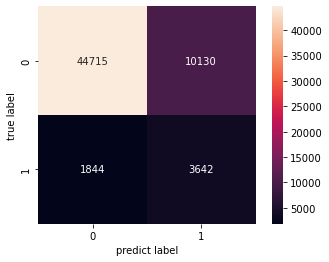

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('accuracy:', accuracy_score(y_test, y_pred_svmsmote))
print('precision:', precision_score(y_test, y_pred_svmsmote))
print('recall:', recall_score(y_test, y_pred_svmsmote))
print('f1 socre:', f1_score(y_test, y_pred_svmsmote))
cm = confusion_matrix(y_test, y_pred_svmsmote)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8295447994209779


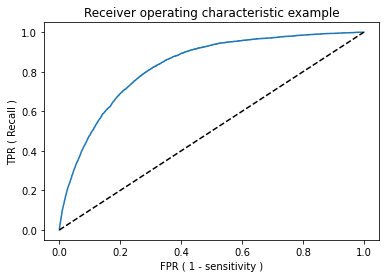

In [21]:
y_pred_decision = svm_svmsmote_model.decision_function(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, y_pred_decision))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR ( 1 - sensitivity )')
plt.ylabel('TPR ( Recall )')
plt.title('Receiver operating characteristic example')
plt.show()

### SMOTE

In [22]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_smote_model = SVC(kernel='rbf')
svm_smote_model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_smote = svm_smote_model.predict(x_test)


C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.7082428602211135
precision: 0.20981030848821614
recall: 0.7983959168793292
f1 socre: 0.33229648736818146
[[38349 16496]
 [ 1106  4380]]


Text(83.40000000000006, 0.5, 'true label')

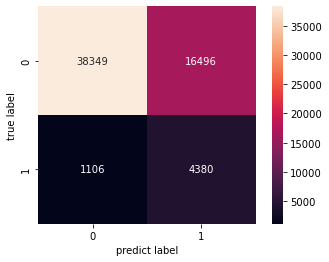

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('accuracy:', accuracy_score(y_test, y_pred_smote))
print('precision:', precision_score(y_test, y_pred_smote))
print('recall:', recall_score(y_test, y_pred_smote))
print('f1 socre:', f1_score(y_test, y_pred_smote))
cm = confusion_matrix(y_test, y_pred_smote)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.820162832869366


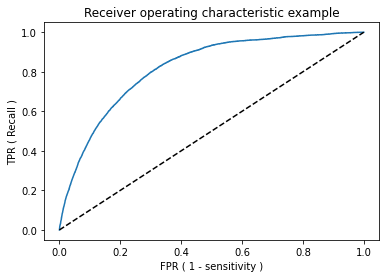

In [24]:
y_pred_decision = svm_smote_model.decision_function(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, y_pred_decision))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR ( 1 - sensitivity )')
plt.ylabel('TPR ( Recall )')
plt.title('Receiver operating characteristic example')
plt.show()

### Borderline SMOTE

In [25]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_border_model = SVC(kernel='rbf')
svm_border_model.fit(x_train_BorderlineSM, y_train_BorderlineSM)
y_pred_border = svm_border_model.predict(x_test)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.723989325554027
precision: 0.21780226445612616
recall: 0.7854538826102807
f1 socre: 0.3410368025326474
[[39370 15475]
 [ 1177  4309]]


Text(83.40000000000006, 0.5, 'true label')

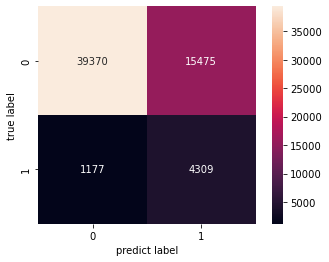

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('accuracy:', accuracy_score(y_test, y_pred_border))
print('precision:', precision_score(y_test, y_pred_border))
print('recall:', recall_score(y_test, y_pred_border))
print('f1 socre:', f1_score(y_test, y_pred_border))
cm = confusion_matrix(y_test, y_pred_border)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8260755720052473


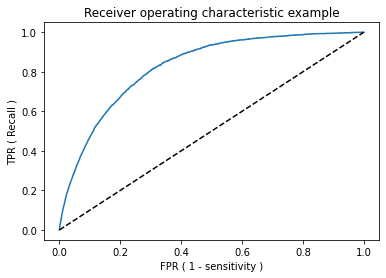

In [27]:
y_pred_decision = svm_border_model.decision_function(x_test)
print(roc_auc_score(y_test, y_pred_decision))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR ( 1 - sensitivity )')
plt.ylabel('TPR ( Recall )')
plt.title('Receiver operating characteristic example')
plt.show()

### ADASYN

In [28]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_adasyn_model = SVC(kernel='rbf')
svm_adasyn_model.fit(x_train_ADASYN, y_train_ADASYN)
y_pred_adasyn = svm_adasyn_model.predict(x_test)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.6730039283287199
precision: 0.19521486046909775
recall: 0.8313889901567627
f1 socre: 0.31618717504332755
[[36042 18803]
 [  925  4561]]


Text(83.40000000000006, 0.5, 'true label')

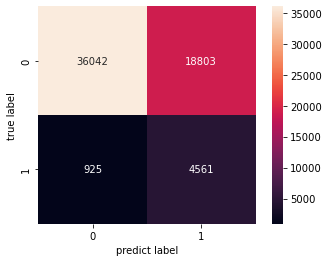

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('accuracy:', accuracy_score(y_test, y_pred_adasyn))
print('precision:', precision_score(y_test, y_pred_adasyn))
print('recall:', recall_score(y_test, y_pred_adasyn))
print('f1 socre:', f1_score(y_test, y_pred_adasyn))
cm = confusion_matrix(y_test, y_pred_adasyn)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8163008836722001


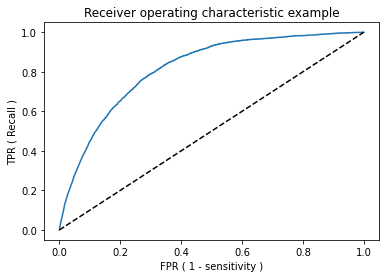

In [30]:
y_pred_decision = svm_adasyn_model.decision_function(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, y_pred_decision))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR ( 1 - sensitivity )')
plt.ylabel('TPR ( Recall )')
plt.title('Receiver operating characteristic example')
plt.show()

### SMOTE ENN

In [31]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_smoteenn_model = SVC(kernel='rbf')
svm_smoteenn_model.fit(x_train_SMOTEENN, y_train_SMOTEENN)
y_pred_SMOTEENN = svm_smoteenn_model.predict(x_test)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.7114584541943612
precision: 0.21346856373774273
recall: 0.8095151294203426
f1 socre: 0.33784709014834535
[[38482 16363]
 [ 1045  4441]]


Text(83.40000000000006, 0.5, 'true label')

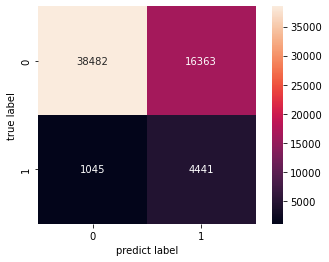

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('accuracy:', accuracy_score(y_test, y_pred_SMOTEENN))
print('precision:', precision_score(y_test, y_pred_SMOTEENN))
print('recall:', recall_score(y_test, y_pred_SMOTEENN))
print('f1 socre:', f1_score(y_test, y_pred_SMOTEENN))
cm = confusion_matrix(y_test, y_pred_SMOTEENN)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.829204829625079


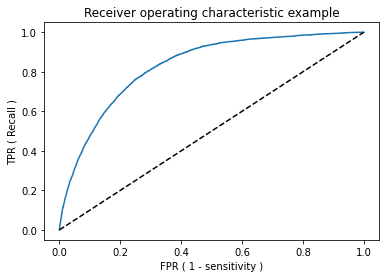

In [33]:
y_pred_decision = svm_smoteenn_model.decision_function(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, y_pred_decision))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR ( 1 - sensitivity )')
plt.ylabel('TPR ( Recall )')
plt.title('Receiver operating characteristic example')
plt.show()

In [ ]:
'''from sklearn.model_selection import GridSearchCV
#'kernel': ['rbf', 'poly', 'sigmoid']
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,refit=True,verbose=2)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_params_)
grid_predictions = grid.predict(x_test)'''

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#disp = plot_confusion_matrix(svm_model, x_test, y_test, cmap='cividis', colorbar=True)

In [ ]:
#classification_report(y_test,grid_predictions)

## cost sensitive learning

In [34]:
from sklearn.svm import SVC
#svm_model = SVC(kernel='rbf', C=8, gamma=0.1) # poly, linear
svm_model_weight = SVC(kernel='rbf', class_weight='balanced')
svm_model_weight.fit(x_train, y_train)
y_pred_weight = svm_model_weight.predict(x_test)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.7192322355008205
precision: 0.21855801838108813
recall: 0.8106088224571637
f1 socre: 0.3442883133975922


Text(83.40000000000006, 0.5, 'true label')

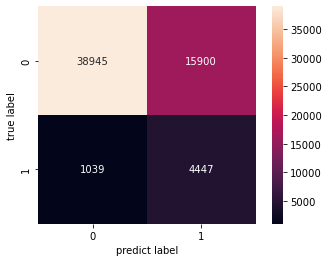

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print('accuracy:', accuracy_score(y_test, y_pred_weight))
print('precision:', precision_score(y_test, y_pred_weight))
print('recall:', recall_score(y_test, y_pred_weight))
print('f1 socre:', f1_score(y_test, y_pred_weight))
cm = confusion_matrix(y_test, y_pred_weight)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

In [ ]:
'''from sklearn.metrics import roc_curve, roc_auc_score
pred_proba_class1 = svm_model_weight.predict_proba(x_test)[:, 1]
print('roc auc score:', roc_auc_score(y_test, pred_proba_class1))
def roc_curve_plot(y_test, pred_proba_class1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
    plt.plot(fprs, tprs, label='ROC')
    # 가운데  대각선 직선
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR ( 1 - sensitivity )'); plt.ylabel('TPR ( Recall )')
    plt.legend()
roc_curve_plot(y_test, pred_proba_class1)'''

In [36]:
y_pred_decision = svm_model_weight.decision_function(x_test)

C:\Users\hyomi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8348846583752235


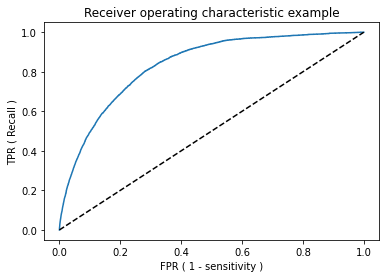

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, y_pred_decision))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR ( 1 - sensitivity )')
plt.ylabel('TPR ( Recall )')
plt.title('Receiver operating characteristic example')
plt.show()

## save model 

In [38]:
import pickle, joblib
# from sklearn.externals import joblib
joblib.dump(svm_svmsmote_model, './OneHot_model/svm_svmsmote_model.pkl')
joblib.dump(svm_smote_model, './OneHot_model/svm_smote_model.pkl')
joblib.dump(svm_border_model, './OneHot_model/svm_border_model.pkl')
joblib.dump(svm_model_weight, './OneHot_model/svm_model_weight.pkl')
joblib.dump(svm_adasyn_model, './OneHot_model/svm_adasyn_model.pkl')
joblib.dump(svm_smoteenn_model, './OneHot_model/svm_smoteenn_model.pkl')

# load
#loaded_model = joblib.load('.pkl')

['./OneHot_model/svm_smoteenn_model.pkl']

In [40]:
loaded_model = joblib.load('./model/svm_svmsmote_model.pkl')

In [42]:
loaded_model

SVC()

In [43]:
temp = loaded_model.predict(x_test)